## Introducción a Análisis EDA

### Paso 1: Crear funciones de trabajo

In [53]:
###Cargue de librerías
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

###Funcion para cargue de la información
def importDatos(ruta,archivo,ext):
    if ext=='.csv':
        data = pd.read_csv(ruta+archivo+ext)
        return data
    elif ext=='.xlsx':
        data = pd.read_excel(ruta+archivo+ext)
        return data
    else:
        print('Extensión diferente')

##Función para revisión de datos NAN
def datos_NA(df):
    if isinstance(df, pd.DataFrame):
        total_na = df.isna().sum().sum()
        print("Dimensiones : %d filas, %d columnas" % (df.shape[0], df.shape[1]))
        print("Total Valores NA : %d " % (total_na))
        print("%38s %10s     %10s %10s" % ("Nombre Columna", "Tipo de Dato", "#Distintos", "Valores NA"))
        col_name = df.columns
        dtyp = df.dtypes
        uniq = df.nunique()
        na_val = df.isna().sum()
        for i in range(len(df.columns)):
            print("%38s %10s   %10s %10s" % (col_name[i], dtyp[i], uniq[i], na_val[i]))
        
    else:
        print("Se esperaba dataframe %15s" % (type(df)))

##Función histograma para revisar si se reemplaza con la media o mediana el datos NA
def histoPlot(df, nomCol,anchoBar):
    sns.histplot(data=df, x=nomCol, binwidth=anchoBar, kde=True)

##Función para imputación de datos NA con la media o mediana cuando es numérico
def imputacionNA(df, nomCol, param):
    if param == 'mean':
        df[nomCol]=df[nomCol].fillna(df[nomCol].mean())
        return df[nomCol]
    else:
        df[nomCol]=df[nomCol].fillna(df[nomCol].median())
        return df[nomCol]

##Función para revisar datos Categóricos
def revCategoricos(df, nomCol):
    rev = df[nomCol].value_counts()
    return rev

##Función para reemplazo de datos categóricos inconsistentes
def imputacionCat(df, nomCol, param, paramdos):
    df[nomCol]= np.where(df[nomCol]==param, paramdos, df[nomCol])
    return df[nomCol]

##Función limpieza de datos NA categóricos
def imputacionCatNa(df, nomCol):
    df[nomCol] = df[nomCol].fillna(df[nomCol].mode()[0])
    return df[nomCol]

##Función para cambiar tipo de dato object a float64 cuando el datos es numero en cadena de texto
def cambioTextNum(df, nomCol, tipo):
    df[nomCol]= df[nomCol].astype(tipo)
    return df[nomCol]

##Función para cambiar de texto a numero escogiendo los valores a asignar
def camTextNumero(df, nomCol, param, paramdos, paramtres):
    df[nomCol]= np.where(df[nomCol]==param, paramdos, paramtres)
    return df[nomCol] 



### Paso 2: Activación de funciones

In [54]:
##Importación de datos
datos = importDatos('C:/Users/Supermercado/Downloads/Limpieza/','CovidDiagnosis','.xlsx')
datos

,Age,Gender,Temperature,Headache,Fever,Hospital,CovidDiagnosis
0,12.0,Masculino,36°,SI,1.0,Moncaleano,positive
1,35.0,Femenino,38,NO,0.0,Medilaser,negative
2,65.0,NaN,36C,YES,1.0,Carmen Emilia,negative
3,78.0,NaN,39,NOP,1.0,Moncaleano,negative
4,41.0,Masculino,40.,SI,0.0,Medilaser,positive
...,...,...,...,...,...,...,...
94,7.0,Femenino,42,OUI,1.0,Medilaser,positive
95,7.0,Masculino,35,OUI,0.0,Carmen Emilia,positive
96,25.0,Femenino,35.2,YES,NaN,Moncaleano,negative
97,26.0,Femenino,35.6,YES,NaN,Medilaser,negative


In [55]:
##Revisión de datos NA
datos_NA(datos)

Dimensiones : 99 filas, 7 columnas
Total Valores NA : 49 
                        Nombre Columna Tipo de Dato     #Distintos Valores NA
                                   Age    float64           46          3
                                Gender     object            6          3
                           Temperature     object           30          1
                              Headache     object            6         35
                                 Fever    float64            2          7
                              Hospital     object            3          0
                        CovidDiagnosis     object            2          0


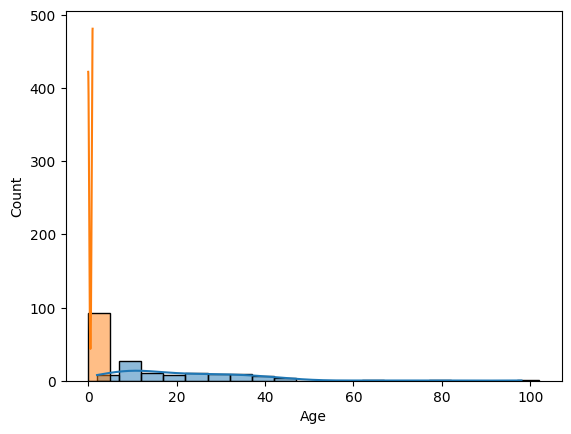

In [56]:
##Creación de histogramas para indagar si se reemplaza por media o mediana
histoPlot(datos, 'Age',5)
histoPlot(datos, 'Fever',5)

In [57]:
##Imputación con la mediana
datos['Age'] = imputacionNA(datos,'Age','median')
datos['Fever'] = imputacionNA(datos,'Fever','median')

In [58]:
##Revisar datos categóricos
revCategoricos(datos, 'Gender')


Femenino          60
Masculino         23
Masculinoooo       6
femenino           5
Masculino…..//     1
masculino          1
Name: Gender, dtype: int64

In [59]:
##Reemplazo de datos categoricos inconsistentes
datos['Gender'] = imputacionCat(datos, 'Gender', 'Masculinoooo','Masculino')
datos['Gender'] = imputacionCat(datos, 'Gender', 'Masculino…..//','Masculino')
datos['Gender'] = imputacionCat(datos, 'Gender', 'masculino','Masculino')

datos['Gender'] = imputacionCat(datos, 'Gender', 'femenino','Femenino')


In [60]:
##Reemplazo de datos NA categóricos
datos['Gender']= imputacionCatNa(datos, 'Gender')

In [61]:
##Convertir a numérico datos de temperatura - 36C
datos['Temperature'] = imputacionCat(datos, 'Temperature','36C','36')
datos['Temperature'] = imputacionCat(datos, 'Temperature','36°','36')


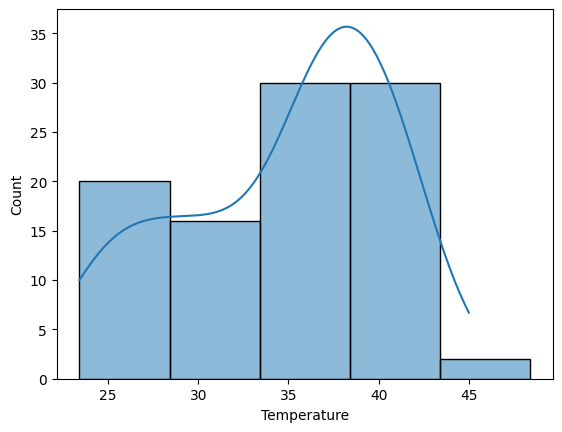

In [62]:
##cambiar de texto a numerico tipo float64
datos['Temperature'] = cambioTextNum(datos, 'Temperature', 'float64')

histoPlot(datos, 'Temperature',5)

datos['Temperature'] = imputacionNA(datos,'Temperature','median')



In [63]:
##Revisión dolor de cabeza
revCategoricos(datos, 'Headache')

datos['Headache'] = imputacionCat(datos, 'Headache', 'NOP','NO')
datos['Headache'] = imputacionCat(datos, 'Headache', 'YES','SI')
datos['Headache'] = imputacionCat(datos, 'Headache', 'SI ','SI')
datos['Headache'] = imputacionCat(datos, 'Headache', 'OUI','SI')

##Valores NA - moda
datos['Headache'] = imputacionCatNa(datos, 'Headache')

### Paso 3: Convertir los valores con Label Encoder u One Hot Encoder

In [64]:
## Convertir Femenino y Masculino a valores entre 1 y 0
datos['Gender']=camTextNumero(datos, 'Gender', 'Femenino',0, 1)
revCategoricos(datos, 'Gender')


0    68
1    31
Name: Gender, dtype: int64

In [65]:
datos['Headache']=camTextNumero(datos, 'Headache', 'SI',0, 1)
revCategoricos(datos, 'Headache')

0    71
1    28
Name: Headache, dtype: int64

In [66]:
datos['Hospital'].value_counts()

Moncaleano       33
Medilaser        33
Carmen Emilia    33
Name: Hospital, dtype: int64

In [67]:
from sklearn import preprocessing

label_encoder = preprocessing.LabelEncoder()

datos['Hospital']= label_encoder.fit_transform(datos['Hospital']) 

datos['Hospital'].value_counts()


2    33
1    33
0    33
Name: Hospital, dtype: int64

In [68]:
dummies = pd.get_dummies(datos['Hospital'])

dummies.head()

df = pd.concat([datos, dummies], axis = 1)

df = df.drop(columns=['Hospital'])

In [69]:
df.head()

,Age,Gender,Temperature,Headache,Fever,CovidDiagnosis,0,1,2
0,12.0,1,36.0,0,1.0,positive,0,0,1
1,35.0,0,38.0,1,0.0,negative,0,1,0
2,65.0,0,36.0,0,1.0,negative,1,0,0
3,78.0,0,39.0,1,1.0,negative,0,0,1
4,41.0,1,40.0,0,0.0,positive,0,1,0


In [70]:
df.columns = ['Edad','Genero','Temp','Dcabeza','Fiebre', 'CovDiag', 'HCarmen', 'HMedilaser','HMoncaleano']

df.head()

,Edad,Genero,Temp,Dcabeza,Fiebre,CovDiag,HCarmen,HMedilaser,HMoncaleano
0,12.0,1,36.0,0,1.0,positive,0,0,1
1,35.0,0,38.0,1,0.0,negative,0,1,0
2,65.0,0,36.0,0,1.0,negative,1,0,0
3,78.0,0,39.0,1,1.0,negative,0,0,1
4,41.0,1,40.0,0,0.0,positive,0,1,0


In [71]:
diag = df.iloc[3:50,[0,1,5]]

diag.head()

,Edad,Genero,CovDiag
3,78.0,0,negative
4,41.0,1,positive
5,18.0,0,positive
6,98.0,0,negative
7,12.0,0,negative
